#How do an individual runner's demographic information, the weather, and split times predict their overall finishing time in the Boston Marathon?

#Data Source
Our primary data set is the complete list of finishers from the 2015, 2016, and 2017 Boston Marathon. It contains a total of 79,368 runners spread over the three years and was scraped directly from the Boston Athletic Association's website. The data was sourced from [Kaggle](https://www.kaggle.com/rojour/boston-results).

Additionally, we obtained daily weather data from [Kaggle](https://www.kaggle.com/jqpeng/boston-weather-data-jan-2013-apr-2018) for the City of Boston from 2013-2018. The only days we were concerned with were the days the Marathon was run in 2015-2017. Specifically:

*   April 20, 2015
*   April 18, 2016
*   April 17, 2017

The data contains information about the runners, namely


1.   Bib                                         Assigned race number based on qualifying time. "F" could appear for female elites.
2.   Name                                    Name of runner (Last, First)
3.   Age                                       Age on race day
4.   M/F                                       Runner's gender
5.   City                                        Runner's city of residence
6.   State                                     Runner's state of residence (if applicable).
7.   Country                                Runner's country of residence
8.   Citizen                                  Runner's nationality (optional)
9.   5K                                         Runner's time at 5k
10. 10K                                       Runner's time at 10k
11. 15K                                       Runner's time at 15k
12. 20K                                       Runner's time at 20k
13. Half                                       Runner's time at halfway point
14. 25K                                       Runner's time at 25k
15. 30K                                       Runner's time at 30k
16. 35K                                       Runner's time at 35k
17. 40K                                       Runner's time at 40k
18. Pace                                     Runner's overall minute per mile pace
19. Proj                                       TimeRunner's projected time during the race (empty)
20. Official                                  TimeRunner's official finishing time
21. Overall                                  Runner's overall raking
22. Gender                                  Runner's ranking in their gender
23. Division                                 Runner's ranking in their age division



#Objective
Using our data, we sought to indentify key characteristics that impact a runner's overall time in the marathon. These include age, gender, split times, and the weather. 

What characterizes a truly "elite" runner? Are there skills required in terms of pacing that go beyond simply being "fast?" This is something else we sought to understand by visualizing our data in a host of different ways. 

*[additional stuff to add: hitting the wall- men vs women. age. top 100 vs everyone else. top 1000 vs everyone else, U.S./Canada vs. rest of world.]*

First, we need to upload the data sets to begin analysis of the data:

In [1]:
#Upload datasets: Boston Marathon Finishers and Boston's Daily Weather datatsets
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive')
df=pd.read_csv("/content/gdrive/Team Drives/MSDi - Team 2/Dataset/marathon_results_all_data.csv")
df.head()
#df.info()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Year
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,2015
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,2015
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,2015
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,2015
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,2015


You should now see a full table of the marathon finisher data, with the top five finishers from 2015 appearing at the top. Before proceeding further, let's confirm how many runners are in our data set.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79638 entries, 0 to 79637
Data columns (total 26 columns):
Unnamed: 0       79638 non-null int64
Bib              79638 non-null object
Name             79638 non-null object
Age              79638 non-null int64
M/F              79638 non-null object
City             79637 non-null object
State            70645 non-null object
Country          79638 non-null object
Citizen          3440 non-null object
Unnamed: 9       241 non-null object
5K               79638 non-null object
10K              79638 non-null object
15K              79638 non-null object
20K              79638 non-null object
Half             79638 non-null object
25K              79638 non-null object
30K              79638 non-null object
35K              79638 non-null object
40K              79638 non-null object
Pace             79638 non-null object
Proj Time        79638 non-null object
Official Time    79638 non-null object
Overall          79638 non-null int64


As you see in the "Name" and other columns, a total of 79,638 runners completed the race over the three years. Note that since the BAA only logs "State" data for those runners hailing from within the United States and Canada, we also know that there were 70,645 runners from the U.S. and Canada and 8993 from the rest of the world.

We've got two columns (0 and 9) that do not actually contain any data. Additionally, we don't need "Proj Time;" this is used to track runners during the race, but once they cross the finish line their "projected time" is the same as their "Official Time." These excess columns are cluttering up our table, so let's get rid of them.

In [3]:
df = df.drop(df.columns[[0, 9]], axis=1)
df = df = df.drop('Proj Time', 1)
df.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,10K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,0:14:43,0:29:43,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,2:09:17,1,1,1,2015
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,0:14:43,0:29:43,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,2:09:48,2,2,2,2015
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,0:14:43,0:29:43,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,2:10:22,3,3,3,2015
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,0:14:43,0:29:44,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,2:10:47,4,4,4,2015
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,0:14:43,0:29:44,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,2:10:49,5,5,5,2015


In order to begin drawing conclusions from the data, we must first clean it so that all times are now in a format we can manipulate easily. We chose seconds to give us maximum specificity with each value.

In [4]:
#Clean Data
#replacing all - values with None

df['Country']=df['Country'].replace('GER','DEU')
#Format the times to appear as minutes- this will help bring more insights
#Converting split times to time in seconds
df['5Ks']=[int(x[0])*3600+int(x[1])*60+int(x[2]) for x in df['5K'].str.split(':')]
df['10Ks']=[int(x[0])*3600+int(x[1])*60+int(x[2]) for x in df['10K'].str.split(':')]
df['15Ks']=[int(x[0])*3600+int(x[1])*60+int(x[2]) for x in df['15K'].str.split(':')]
df['20Ks']=[int(x[0])*3600+int(x[1])*60+int(x[2]) for x in df['20K'].str.split(':')]
df['25Ks']=[int(x[0])*3600+int(x[1])*60+int(x[2]) for x in df['25K'].str.split(':')]
df['30Ks']=[int(x[0])*3600+int(x[1])*60+int(x[2]) for x in df['30K'].str.split(':')]
df['35Ks']=[int(x[0])*3600+int(x[1])*60+int(x[2]) for x in df['35K'].str.split(':')]
df['40Ks']=[int(x[0])*3600+int(x[1])*60+int(x[2]) for x in df['40K'].str.split(':')]
df['Halfs']=[int(x[0])*3600+int(x[1])*60+int(x[2]) for x in df['Half'].str.split(':')]
df['40Ks']=[int(x[0])*3600+int(x[1])*60+int(x[2]) for x in df['40K'].str.split(':')]
df['Paces']=[int(x[0])*3600+int(x[1])*60+int(x[2]) for x in df['Pace'].str.split(':')]
df['Official Times']=[int(x[0])*3600+int(x[1])*60+int(x[2]) for x in df['Official Time'].str.split(':')]


df.drop(columns=['5K','10K','15K','20K','25K','Half','30K','35K','40K','Pace','Official Time'],axis=1, inplace=True)
df.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Overall,Gender,...,10Ks,15Ks,20Ks,25Ks,30Ks,35Ks,40Ks,Halfs,Paces,Official Times
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,1,1,...,1783,2697,3629,4567,5520,6479,7359,3842,296,7757
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,2,2,...,1783,2698,3628,4567,5519,6479,7362,3841,298,7788
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,3,3,...,1783,2697,3629,4567,5520,6479,7381,3842,299,7822
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,4,4,...,1784,2701,3629,4567,5520,6483,7427,3842,300,7847
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,5,5,...,1784,2698,3628,4567,5520,6479,7407,3841,300,7849


We now have the same exact data, but all split times are in seconds rather than hours:minutes:seconds.

To examine where runners differentiate themselves from one another, let's first look at what happens at the halfway point. In order to assess runners' performance in the second half of the race so that we can compare it to the first half, we create a new column called "Second Half" and add it to our data set:

In [5]:
#Assign the "Second Half" for the time spent of second half:
df["Second Half"] = df['Official Times'] - df['Halfs']
df.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Overall,Gender,...,15Ks,20Ks,25Ks,30Ks,35Ks,40Ks,Halfs,Paces,Official Times,Second Half
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,1,1,...,2697,3629,4567,5520,6479,7359,3842,296,7757,3915
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,2,2,...,2698,3628,4567,5519,6479,7362,3841,298,7788,3947
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,3,3,...,2697,3629,4567,5520,6479,7381,3842,299,7822,3980
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,4,4,...,2701,3629,4567,5520,6483,7427,3842,300,7847,4005
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,5,5,...,2698,3628,4567,5520,6479,7407,3841,300,7849,4008


To determine whether the runner had a faster time in the first half or second half of the race, we perform a simple computation (first half time - second half time) and assign the difference to a new column, "Half_Diff." If the value is *positive*, then the runner went faster in the second half of the race; if it's *negative*, then the runner went slower.

In [6]:
df["Half_diff"] = df['Halfs'] - df['Second Half']
df.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Overall,Gender,...,20Ks,25Ks,30Ks,35Ks,40Ks,Halfs,Paces,Official Times,Second Half,Half_diff
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,1,1,...,3629,4567,5520,6479,7359,3842,296,7757,3915,-73
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,2,2,...,3628,4567,5519,6479,7362,3841,298,7788,3947,-106
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,3,3,...,3629,4567,5520,6479,7381,3842,299,7822,3980,-138
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,4,4,...,3629,4567,5520,6483,7427,3842,300,7847,4005,-163
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,5,5,...,3628,4567,5520,6479,7407,3841,300,7849,4008,-167


This new column allows us to see the distribution of how many runners sped up over the course of the race compared with how many slowed down. How did this distribution break down?

In [7]:
difference=df.loc[:,'Half_diff']
pos, neg, same = 0, 0, 0
for num in difference: 
    if num > 0: 
        pos += 1
    elif num == 0: 
        same += 1
    else: 
        neg += 1
print(pos,"runners went faster in the second half of the race.") 
print(neg,"runners slowed down in the second half of the race.")
print(same,"runners went exactly the same speed in each half of the race.")
print("The average difference between the first half and the second half was", round(-df['Half_diff'].mean(),2),"seconds.")

3522 runners went faster in the second half of the race.
76088 runners slowed down in the second half of the race.
28 runners went exactly the same speed in each half of the race.
The average difference between the first half and the second half was 881.69 seconds.


To help us represent what this means visually, let's add a new column to the data called "Half_change" stating whether the runner's first half was slower, faster, or the same as their second half:

In [8]:
df.loc[df['Second Half'] == df['Halfs'], 'Half_change'] = 'Same'
df.loc[df['Second Half'] > df['Halfs'], 'Half_change'] = 'Slower'
df.loc[df['Second Half'] < df['Halfs'], 'Half_change'] = 'Faster'
df.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Overall,Gender,...,25Ks,30Ks,35Ks,40Ks,Halfs,Paces,Official Times,Second Half,Half_diff,Half_change
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,1,1,...,4567,5520,6479,7359,3842,296,7757,3915,-73,Slower
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,2,2,...,4567,5519,6479,7362,3841,298,7788,3947,-106,Slower
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,3,3,...,4567,5520,6479,7381,3842,299,7822,3980,-138,Slower
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,4,4,...,4567,5520,6483,7427,3842,300,7847,4005,-163,Slower
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,5,5,...,4567,5520,6479,7407,3841,300,7849,4008,-167,Slower


Or, represented visually:

(-1500, 500)

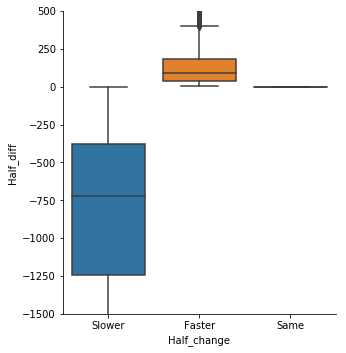

In [9]:
sns.catplot(x="Half_change", y="Half_diff", kind="box", data=df)
plt.ylim(-1500, 500)

As we can see, only a very small percentage of runners (4.46%) held their pace or sped up during the race, and those who did rarely exceeded about 180 seconds (3 minutes) faster than the first half. This isn't terribly surprising, since people get *very* tired while running a marathon.

But let's drill down a little more. When, exactly, do these runners get tired? Knowing that would help us drill down on what makes someone an "elite" runner, and in turn would help future runners work out strategies for how to dole out their energy.

Regarding the Boston Marathon, there is one famous location in the latter half of the race that likely is the culprit for these slower times...

#Hitting the Wall
One of the most famous parts of the Boston Marathon is Newton's [Heartbreak Hill](https://www.boston.com/sports/boston-marathon/2019/04/03/boston-marathon-heartbreak-hill-origin). Coming at roughly the 20 mile mark of the race, its 91-foot incline may *seem* innocuous enough; however, after climbing three other hills shortly before it and with so much of the race already completed, runners often falter at this part of the course. Its positioning is no accident, either. In marathon running, conventional wisdom says that most runners "hit the wall" at mile 20, experiencing a wave of fatigue that makes it extremely difficult to make it to the finish line.

As we know, though, conventional wisdom isn't always so wise. Let's split our data up again, this time looking at runners' pace both before and after Heartbreak Hill. Is "the wall" real? Does it affect different types or runners more? Let's find out!

Runners begin to "summit" Heartbreak Hill [around the 20 mile mark](https://boston.cbslocal.com/2019/04/01/boston-marathon-mile-by-mile-runners-guide/), so we will use that as our guidepost for "The Wall." Since our splits are only in km, we need to do a quick coverstion first to figure out where we should start looking:

In [10]:
print("20 miles is", 20*1.609, "kilometers")

20 miles is 32.18 kilometers


Since this figure is right in the middle of two splits, we'll give the runners a little extra advantage over The Wall and say that their seconds per kilometer (s/km) time up to their 30 KM split is "Pre_HBH." We'll label their s/km time after the 30 KM split, where we'd expect them to hit the wall, as "Post_HBH."

In [11]:
print("Note: a full marathon is", round(26.2*1.609,2), "kilometers")
df["Pre_HBH"] = round(df['30Ks'] / 30,2)
df["Post_HBH"] = round((df['Official Times'] - df['30Ks']) / (26.2*1.609-30),2)
df.head()

Note: a full marathon is 42.16 kilometers


,Bib,Name,Age,M/F,City,State,Country,Citizen,Overall,Gender,...,35Ks,40Ks,Halfs,Paces,Official Times,Second Half,Half_diff,Half_change,Pre_HBH,Post_HBH
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,1,1,...,6479,7359,3842,296,7757,3915,-73,Slower,184.00,184.03
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,2,2,...,6479,7362,3841,298,7788,3947,-106,Slower,183.97,186.66
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,3,3,...,6479,7381,3842,299,7822,3980,-138,Slower,184.00,189.37
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,4,4,...,6483,7427,3842,300,7847,4005,-163,Slower,184.00,191.43
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,5,5,...,6479,7407,3841,300,7849,4008,-167,Slower,184.00,191.60


Similar to before, let's now look at the difference between the two values. If a runner "hit the wall," the difference in s/km will be negative; if not, it will be either zero or positive.

In [12]:
df["HBH_diff"] = df['Pre_HBH'] - df['Post_HBH']
df.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Overall,Gender,...,40Ks,Halfs,Paces,Official Times,Second Half,Half_diff,Half_change,Pre_HBH,Post_HBH,HBH_diff
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,1,1,...,7359,3842,296,7757,3915,-73,Slower,184.00,184.03,-0.03
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,2,2,...,7362,3841,298,7788,3947,-106,Slower,183.97,186.66,-2.69
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,3,3,...,7381,3842,299,7822,3980,-138,Slower,184.00,189.37,-5.37
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,4,4,...,7427,3842,300,7847,4005,-163,Slower,184.00,191.43,-7.43
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,5,5,...,7407,3841,300,7849,4008,-167,Slower,184.00,191.60,-7.60


Now, let's see how "The Wall" impacts the entire population of finishers:

In [0]:
def HBHFunc(dataF, runner_type='runners'):
  up, down, nc = 0, 0, 0
  for num in dataF: 
     if num > 0: 
          up += 1
     elif num == 0: 
          nc += 1
     else: 
          down += 1
  print(up,runner_type+" went faster after Heartbreak Hill and did not hit the wall.") 
  print(down,runner_type+" went slower after Heartbreak Hill and did hit the wall.")
  print(nc,runner_type+" were unaffected by 'the wall' or Heartbreak Hill and maintained the same pace.")
  print("The average difference in seconds per kilometer before and after Heartbreak Hill was", round(-dataF.mean(),2),"seconds.")
  return

In [14]:
Wall=df.loc[:,'HBH_diff']
#Wall
HBHFunc(Wall)


4737 runners went faster after Heartbreak Hill and did not hit the wall.
74890 runners went slower after Heartbreak Hill and did hit the wall.
11 runners were unaffected by 'the wall' or Heartbreak Hill and maintained the same pace.
The average difference in seconds per kilometer before and after Heartbreak Hill was 42.92 seconds.


As before, let's see how this distribution looks on a boxplot.

Text(-10.950000000000003, 0.5, 'Seconds/KM Change')

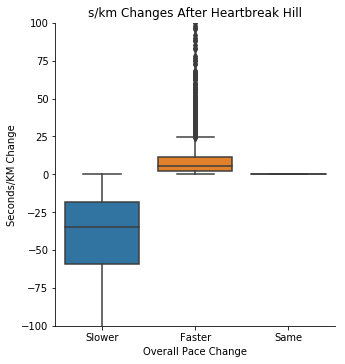

In [15]:
df.loc[df['Pre_HBH'] == df['Post_HBH'], 'HBH_change'] = 'Same'
df.loc[df['Pre_HBH'] > df['Post_HBH'], 'HBH_change'] = 'Faster'
df.loc[df['Pre_HBH'] < df['Post_HBH'], 'HBH_change'] = 'Slower'
sns.catplot(x="HBH_change", y="HBH_diff", kind="box", data=df)
plt.ylim(-100, 100)
plt.title('s/km Changes After Heartbreak Hill')
plt.xlabel("Overall Pace Change")
plt.ylabel("Seconds/KM Change")

But what about the Top 100 runners? Are they similarly impacted by "the wall?"

#Top 100

First, let's generate a list of the Top 100 finishers for both genders in 2015, 2016, and 2017 (600 total runners, 300 each gender)

In [16]:
top100 = df[df['Gender'] <= 100]

top100.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Overall,Gender,...,Halfs,Paces,Official Times,Second Half,Half_diff,Half_change,Pre_HBH,Post_HBH,HBH_diff,HBH_change
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,1,1,...,3842,296,7757,3915,-73,Slower,184.00,184.03,-0.03,Slower
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,2,2,...,3841,298,7788,3947,-106,Slower,183.97,186.66,-2.69,Slower
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,3,3,...,3842,299,7822,3980,-138,Slower,184.00,189.37,-5.37,Slower
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,4,4,...,3842,300,7847,4005,-163,Slower,184.00,191.43,-7.43,Slower
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,5,5,...,3841,300,7849,4008,-167,Slower,184.00,191.60,-7.60,Slower


Now, we'll run the same analysis on this group of 600 total runners.

In [17]:
Wall=top100.loc[:,'HBH_diff']
HBHFunc(Wall)

61 runners went faster after Heartbreak Hill and did not hit the wall.
539 runners went slower after Heartbreak Hill and did hit the wall.
0 runners were unaffected by 'the wall' or Heartbreak Hill and maintained the same pace.
The average difference in seconds per kilometer before and after Heartbreak Hill was 13.25 seconds.


61 out of 600 (10.2%) improved their time - that's much better than the entire sample population (5.9%). Additionally, even for those in the Top 100 who did slow down, the difference in the average pace was much smaller (13.25 s/km slower) than the entire sample (42.92 s/km slower). 

What about men and women? Were they any different? First, we'll look at women:

In [18]:
women = df[df['M/F'] == 'F']
women.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Overall,Gender,...,Halfs,Paces,Official Times,Second Half,Half_diff,Half_change,Pre_HBH,Post_HBH,HBH_diff,HBH_change
30,F11,"Rotich, Caroline",30,F,Nyahururu,NaN,KEN,NaN,31,1,...,4365,332,8695,4330,35,Faster,206.80,204.92,1.88,Faster
31,F2,"Dibaba, Mare",25,F,Shoa,NaN,ETH,NaN,32,2,...,4365,332,8699,4334,31,Faster,206.77,205.33,1.44,Faster
33,F1,"Deba, Buzunesh",27,F,Arsi,NaN,ETH,NaN,34,3,...,4365,333,8709,4344,21,Faster,206.80,206.07,0.73,Faster
39,F10,"Linden, Desiree",31,F,Rochester Mills,MI,USA,NaN,40,4,...,4365,334,8739,4374,-9,Slower,206.77,208.62,-1.85,Slower
43,F8,"Cherop, Sharon",31,F,Marakwet,NaN,KEN,NaN,44,5,...,4366,335,8765,4399,-33,Slower,206.80,210.68,-3.88,Slower


In [19]:
Women_Wall=women.loc[:,'HBH_diff']
HBHFunc(Women_Wall,'women')

2496 women went faster after Heartbreak Hill and did not hit the wall.
33652 women went slower after Heartbreak Hill and did hit the wall.
8 women were unaffected by 'the wall' or Heartbreak Hill and maintained the same pace.
The average difference in seconds per kilometer before and after Heartbreak Hill was 36.44 seconds.


And now we'll check men:

In [20]:
men = df[df['M/F'] == 'M']
men.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Overall,Gender,...,Halfs,Paces,Official Times,Second Half,Half_diff,Half_change,Pre_HBH,Post_HBH,HBH_diff,HBH_change
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,1,1,...,3842,296,7757,3915,-73,Slower,184.00,184.03,-0.03,Slower
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,2,2,...,3841,298,7788,3947,-106,Slower,183.97,186.66,-2.69,Slower
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,3,3,...,3842,299,7822,3980,-138,Slower,184.00,189.37,-5.37,Slower
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,4,4,...,3842,300,7847,4005,-163,Slower,184.00,191.43,-7.43,Slower
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,5,5,...,3841,300,7849,4008,-167,Slower,184.00,191.60,-7.60,Slower


In [21]:
Men_Wall=men.loc[:,'HBH_diff']
HBHFunc(Men_Wall,'men')

2241 men went faster after Heartbreak Hill and did not hit the wall.
41238 men went slower after Heartbreak Hill and did hit the wall.
3 men were unaffected by 'the wall' or Heartbreak Hill and maintained the same pace.
The average difference in seconds per kilometer before and after Heartbreak Hill was 48.3 seconds.


This gender analysis reveals that on the whole, women (6.9% improving their speed) are less likely to "hit the wall" than men (5.2% improving their speed) and even when they do, they lose less time off their average pace (36.4 vs. 48.3 seconds per kilometer). Let's see if this also holds true for our Top 100 data set:

In [22]:
top100_men = men[men['Gender'] <= 100]
top100_women = women[women['Gender'] <= 100]
top100_men.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Overall,Gender,...,Halfs,Paces,Official Times,Second Half,Half_diff,Half_change,Pre_HBH,Post_HBH,HBH_diff,HBH_change
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,1,1,...,3842,296,7757,3915,-73,Slower,184.00,184.03,-0.03,Slower
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,2,2,...,3841,298,7788,3947,-106,Slower,183.97,186.66,-2.69,Slower
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,3,3,...,3842,299,7822,3980,-138,Slower,184.00,189.37,-5.37,Slower
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,4,4,...,3842,300,7847,4005,-163,Slower,184.00,191.43,-7.43,Slower
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,5,5,...,3841,300,7849,4008,-167,Slower,184.00,191.60,-7.60,Slower


In [23]:
top100_women.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Overall,Gender,...,Halfs,Paces,Official Times,Second Half,Half_diff,Half_change,Pre_HBH,Post_HBH,HBH_diff,HBH_change
30,F11,"Rotich, Caroline",30,F,Nyahururu,NaN,KEN,NaN,31,1,...,4365,332,8695,4330,35,Faster,206.80,204.92,1.88,Faster
31,F2,"Dibaba, Mare",25,F,Shoa,NaN,ETH,NaN,32,2,...,4365,332,8699,4334,31,Faster,206.77,205.33,1.44,Faster
33,F1,"Deba, Buzunesh",27,F,Arsi,NaN,ETH,NaN,34,3,...,4365,333,8709,4344,21,Faster,206.80,206.07,0.73,Faster
39,F10,"Linden, Desiree",31,F,Rochester Mills,MI,USA,NaN,40,4,...,4365,334,8739,4374,-9,Slower,206.77,208.62,-1.85,Slower
43,F8,"Cherop, Sharon",31,F,Marakwet,NaN,KEN,NaN,44,5,...,4366,335,8765,4399,-33,Slower,206.80,210.68,-3.88,Slower


In [24]:
Top_Women_Wall=top100_women.loc[:,'HBH_diff']
HBHFunc(Top_Women_Wall,'top women')

49 top women went faster after Heartbreak Hill and did not hit the wall.
251 top women went slower after Heartbreak Hill and did hit the wall.
0 top women were unaffected by 'the wall' or Heartbreak Hill and maintained the same pace.
The average difference in seconds per kilometer before and after Heartbreak Hill was 11.3 seconds.


In [25]:
Top_Men_Wall=top100_men.loc[:,'HBH_diff']
HBHFunc(Top_Men_Wall,'top men')

12 top men went faster after Heartbreak Hill and did not hit the wall.
288 top men went slower after Heartbreak Hill and did hit the wall.
0 top men were unaffected by 'the wall' or Heartbreak Hill and maintained the same pace.
The average difference in seconds per kilometer before and after Heartbreak Hill was 15.19 seconds.


Similarly to our full population, the top 100 women (16.3% improved speed) were less likely to slow down than their male counterparts (4.0%), and those that did reduce their speed slowed down less (11.3 seconds vs. 15.2 seconds).

Now that we know women, especially top women, are least likely to be affected by "the wall," let's see what we can learn about any impact runners' age may have.

#Age
First, let's visualize a breakdown of the participating runners by age and gender:

Text(0.5, 1.0, 'female Runner Age Distribution')

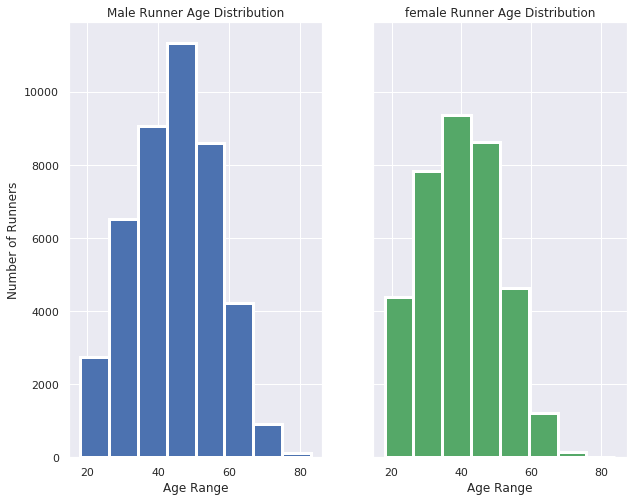

In [26]:
#Assign age division variables for each row:
sns.set(rc={'figure.figsize':(10,8)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(df[df['M/F']=='M']['Age'],bins=8,ax=ax1,axlabel='Age',kde=False,hist_kws={ "linewidth": 3,"alpha": 1, "color": "b"})
ax1.set_title("Male Runner Age Distribution")
sns.distplot(df[df['M/F']=='F']['Age'],bins=8, ax=ax2,axlabel='Age',kde=False,hist_kws={ "linewidth": 3,"alpha": 1, "color": "g"})
ax1.set(xlabel='Age Range', ylabel='Number of Runners')
ax2.set(xlabel='Age Range')
ax2.set_title("female Runner Age Distribution")
#sns.distplot(df['Age'],bins=8)

How about the finishers who finished in the first 100, is the distribution different?:

Text(0.5, 1.0, 'Female Runner Age Distribution')

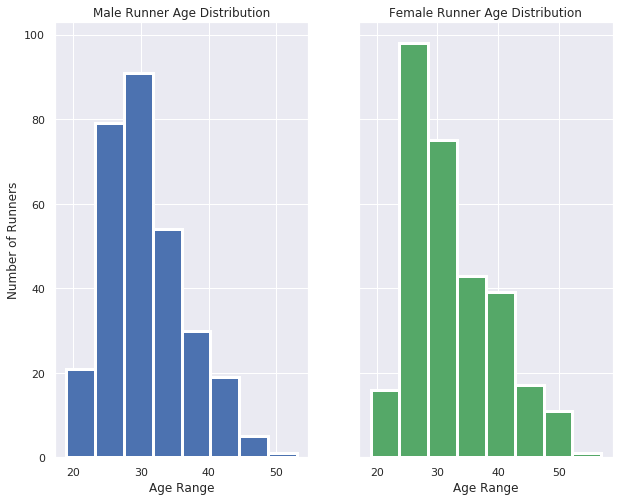

In [27]:

df['age_division'] = pd.cut(df['Age'], [10, 20, 30, 40, 50, 60, 70, 80, 90],labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
Top_100 = df[df['Gender'] <= 100]

#Top_100pd.pivot_table(Top_100, values='Name', index='age_division',aggfunc='count')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(Top_100[Top_100['M/F']=='M']['Age'],bins=8,ax=ax1,axlabel='Age',kde=False,hist_kws={ "linewidth": 3,"alpha": 1, "color": "b"})
ax1.set_title("Male Runner Age Distribution")
sns.distplot(Top_100[Top_100['M/F']=='F']['Age'],bins=8, ax=ax2,axlabel='Age',kde=False,hist_kws={ "linewidth": 3,"alpha": 1, "color": "g"})
ax1.set(xlabel='Age Range', ylabel='Number of Runners')
ax2.set(xlabel='Age Range')
ax2.set_title("Female Runner Age Distribution")

The top 100 male runners are, on average, older than the top 100 female runners. The top 100 runners are, generally speaking, younger than the entire demographic, as seen by the difference in distributions.We can see that among top 100 the concentration shifts toward the runners whose ages are around 20 to 40 years old. Clearly, the top 100 runners are younger than average.

Where do the fastest 5K people end up?

# Age/Gender Analysis

Now lets look at the age distribution among the finishers segregated by their gender:

In [0]:
#Spliting Male and Female
male_runners_df=df[df['M/F']=='M']
female_runners_df=df[df['M/F']=='F']


**Age vs Pace**

How about pace?

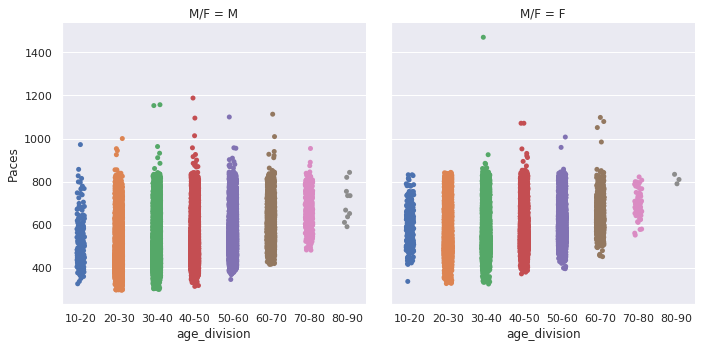

In [29]:
sns.catplot(x="age_division", y="Paces", data=df, col='M/F',jitter=True)

As we see, the paces of the runners are more or less concentrated between 400 and 900, but we see lower variation in females than in males.

Taking a look at the gender split Second half marathon times,

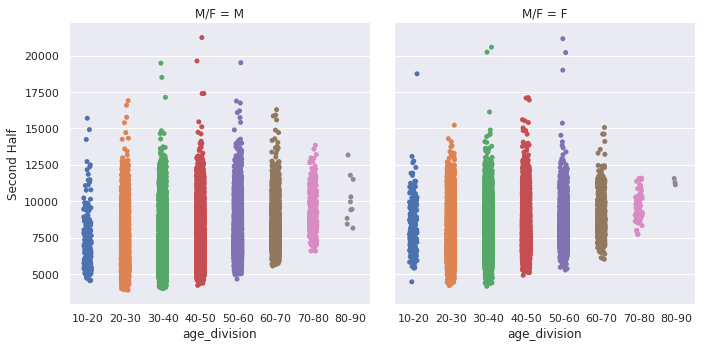

In [30]:
sns.catplot(x="age_division", y="Second Half", data=df, col='M/F',jitter=True)

We can see from the graphs that most runners, no matter their gender is, end up being slower in the second half of marathon.

Lets look at the average different time between first half and second half:

#Analysis based on Weather

There was rain in 2015, while there was none in 2016 and 2017. Because of the consistent years, we joined the data and checked for average pace for all athletes

In [31]:
#Weather Analysis
#Get a sense of the data:
weatherDf=pd.read_csv("/content/gdrive/Team Drives/MSDi - Team 2/Dataset/Weather_data.csv",parse_dates=True)
weatherDf.head()
weatherDf['Year']=[int(x[2]) for x in weatherDf['Date'].str.split('/')]
weatherDf.head()
df=pd.merge(df,weatherDf)
df.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Overall,Gender,...,Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,1,1,...,29.73,10,6,1,25,14,32,0,0.61,Rain
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,2,2,...,29.73,10,6,1,25,14,32,0,0.61,Rain
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,3,3,...,29.73,10,6,1,25,14,32,0,0.61,Rain
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,4,4,...,29.73,10,6,1,25,14,32,0,0.61,Rain
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,5,5,...,29.73,10,6,1,25,14,32,0,0.61,Rain


Taking a look at the average pace for the entire data set for years 2015, 2016 and 2017

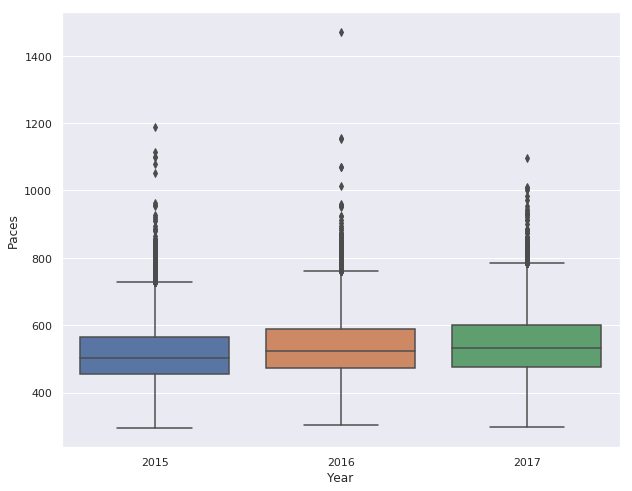

In [32]:
sns.boxplot(x='Year',y='Paces',data=df)

There is only a small change in the pace of the runners overall based on the weather, since it was raining in 2015 and not in 2016 and 2017

Looking at paces of runners by gender


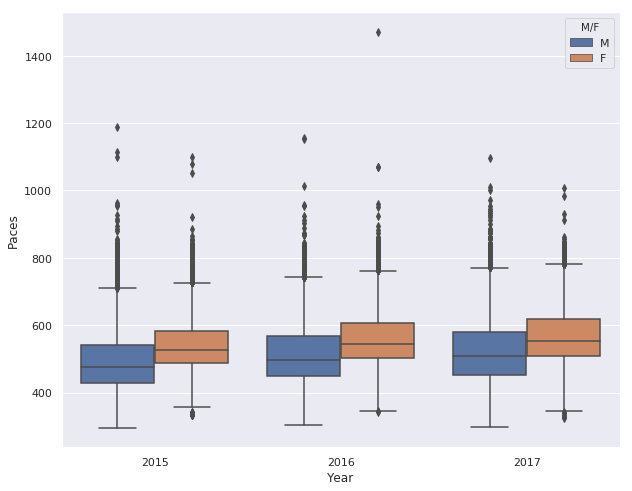

In [33]:
sns.boxplot(x="Year", y="Paces", data=df, hue='M/F')

There does not seem to be major changes over the three years when comparing the genders for pace.

Now, we check by age


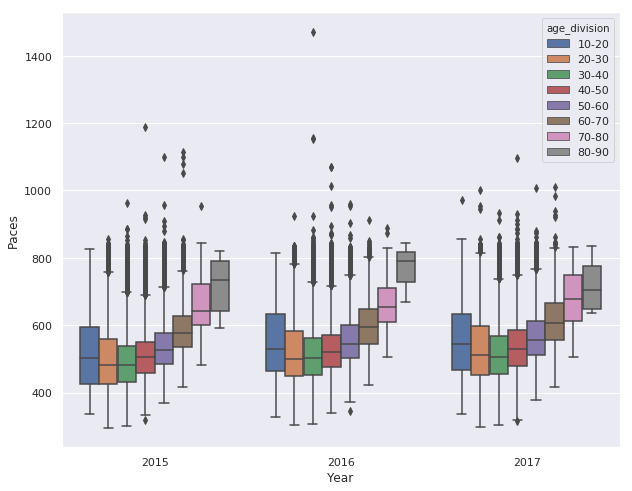

In [34]:
sns.boxplot(x="Year", y="Paces", data=df, hue='age_division')

We see higher dispersion of the oldest running demographic in the rain, with other demographics paces more or less the same.

Effect of temperature?

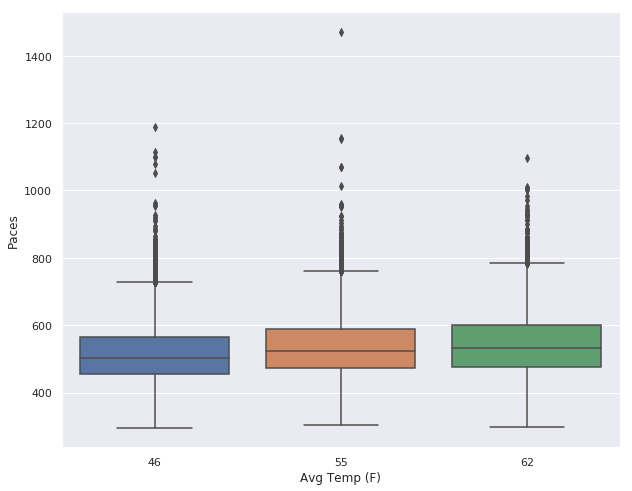

In [35]:
sns.boxplot(x='Avg Temp (F)',y='Paces',data=df)

Effect of precipitation?

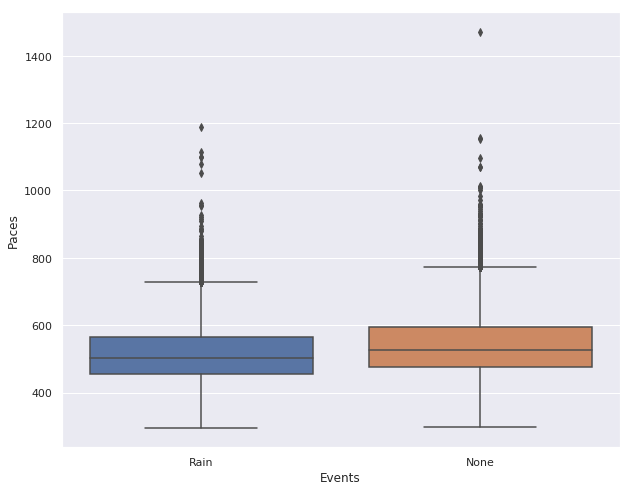

In [36]:
sns.boxplot(x='Events',y='Paces',data=df)

# Correlation analysis 

We wanted to check the overall correlation of the variables with each other, to check what variables could be used to run a regression analysis and would it be worthwhile.

First, we need to drop a few columns- Country, City,M/F, City, State- because they will not be useful and will only complicate things by adding lots of dummy variables.



In [37]:
dfN=df.drop(['Name','Country','City','Citizen','M/F','State','age_division','Date'],axis=1)
dfN.head()

,Bib,Age,Overall,Gender,Division,Year,5Ks,10Ks,15Ks,20Ks,...,Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,3,25,1,1,1,2015,883,1783,2697,3629,...,29.73,10,6,1,25,14,32,0,0.61,Rain
1,4,30,2,2,2,2015,883,1783,2698,3628,...,29.73,10,6,1,25,14,32,0,0.61,Rain
2,8,29,3,3,3,2015,883,1783,2697,3629,...,29.73,10,6,1,25,14,32,0,0.61,Rain
3,11,28,4,4,4,2015,883,1784,2701,3629,...,29.73,10,6,1,25,14,32,0,0.61,Rain
4,10,32,5,5,5,2015,883,1784,2698,3628,...,29.73,10,6,1,25,14,32,0,0.61,Rain


Next, we form dummy variables, using pandas.getdummies function


In [38]:
dfN = pd.get_dummies(dfN, columns=['Events'])
dfN.head()
dfN=dfN.drop(['Events_None'],axis=1)
dfN.head()

,Bib,Age,Overall,Gender,Division,Year,5Ks,10Ks,15Ks,20Ks,...,Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events_Rain
0,3,25,1,1,1,2015,883,1783,2697,3629,...,29.73,10,6,1,25,14,32,0,0.61,1
1,4,30,2,2,2,2015,883,1783,2698,3628,...,29.73,10,6,1,25,14,32,0,0.61,1
2,8,29,3,3,3,2015,883,1783,2697,3629,...,29.73,10,6,1,25,14,32,0,0.61,1
3,11,28,4,4,4,2015,883,1784,2701,3629,...,29.73,10,6,1,25,14,32,0,0.61,1
4,10,32,5,5,5,2015,883,1784,2698,3628,...,29.73,10,6,1,25,14,32,0,0.61,1


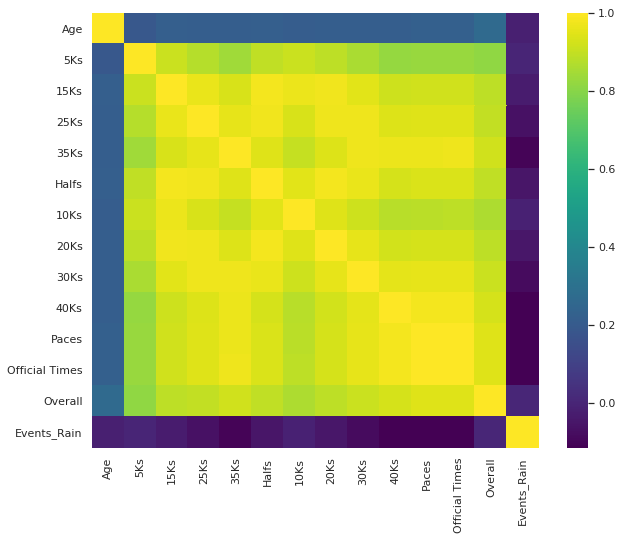

In [39]:
#df.info()
#new data frame with just split times, overall position, age and weather (1->good, 0-> Bad)

dfN=dfN.filter(['Age','5Ks','15Ks','25Ks','35Ks','Halfs','10Ks','20Ks','30Ks','40Ks', 'Second_half','Paces','Official Times','Overall','Events_Rain'],axis=1)

sns.heatmap(dfN.corr(), fmt="g", cmap='viridis')

As we can see, the Weather does not have a bearing on the overall times and placements. FInally, we can look at correlation map to get a sense of the correlated terms

In [40]:
dfN.corr()
#Using Heatmap and correlation, we find that 35K pace, Pace and 40K pace are positively correlated with Overall ranking
#Further, Paces seems to be highly correlated to official times (with a nearly 1 coefficient), so if paces can be identified early, we can predict the overall time taken using predictive analysis


,Age,5Ks,15Ks,25Ks,35Ks,Halfs,10Ks,20Ks,30Ks,40Ks,Paces,Official Times,Overall,Events_Rain
Age,1.000000,0.187659,0.216909,0.212817,0.213575,0.215991,0.207029,0.212797,0.211312,0.213809,0.220676,0.220721,0.264958,-0.016859
5Ks,0.187659,1.000000,0.911025,0.875969,0.842302,0.892998,0.911204,0.889907,0.860117,0.824859,0.828032,0.828853,0.814757,0.000892
15Ks,0.216909,0.911025,1.000000,0.963971,0.932354,0.978878,0.966734,0.975078,0.949508,0.914919,0.919859,0.920713,0.887743,-0.032682
25Ks,0.212817,0.875969,0.963971,1.000000,0.957485,0.974255,0.933784,0.969866,0.969492,0.940810,0.943825,0.944693,0.898746,-0.067651
35Ks,0.213575,0.842302,0.932354,0.957485,1.000000,0.946459,0.901190,0.939017,0.969741,0.965317,0.969230,0.970093,0.918735,-0.102912
Halfs,0.215991,0.892998,0.978878,0.974255,0.946459,1.000000,0.949458,0.981002,0.964315,0.928985,0.935719,0.936550,0.894543,-0.053528
10Ks,0.207029,0.911204,0.966734,0.933784,0.901190,0.949458,1.000000,0.944543,0.917005,0.881918,0.886085,0.886934,0.862662,-0.013707
20Ks,0.212797,0.889907,0.975078,0.969866,0.939017,0.981002,0.944543,1.000000,0.956623,0.922503,0.928259,0.929086,0.888596,-0.050481
30Ks,0.211312,0.860117,0.949508,0.969492,0.969741,0.964315,0.917005,0.956623,1.000000,0.953632,0.959919,0.960728,0.908983,-0.083966
40Ks,0.213809,0.824859,0.914919,0.940810,0.965317,0.928985,0.881918,0.922503,0.953632,1.000000,0.978642,0.979500,0.927609,-0.115896


Predictive Analysis- Using Space kept- will consult with the Prof and add that

# Country Analysis

Now let's anlalyze the distribution of runners by country:

In [41]:
#import os
!pip install geopandas
!pip install descartes


     |████████████████████████████████| 901kB 4.4MB/s 
     |████████████████████████████████| 17.9MB 42.1MB/s 
     |████████████████████████████████| 10.8MB 33.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


Using Pivot Tables to calculate number of runners for the three years based on country

In [0]:
import geopandas as gpd
newTab=pd.pivot_table(df, values='Name', index='Country',aggfunc='count')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data=pd.merge(world, newTab, left_on='iso_a3', right_on='Country',how='left')
#data[data['iso_a3']=='DEU']
newTabWONA=newTab.drop(['USA','CAN'])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
dataNew=pd.merge(world, newTabWONA, left_on='iso_a3', right_on='Country',how='left')
#world.plot()


Since a majority of runners are from the US, we get a very skewed result. For a more thorough heatmap, we can split the data and keep the US seperate.

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


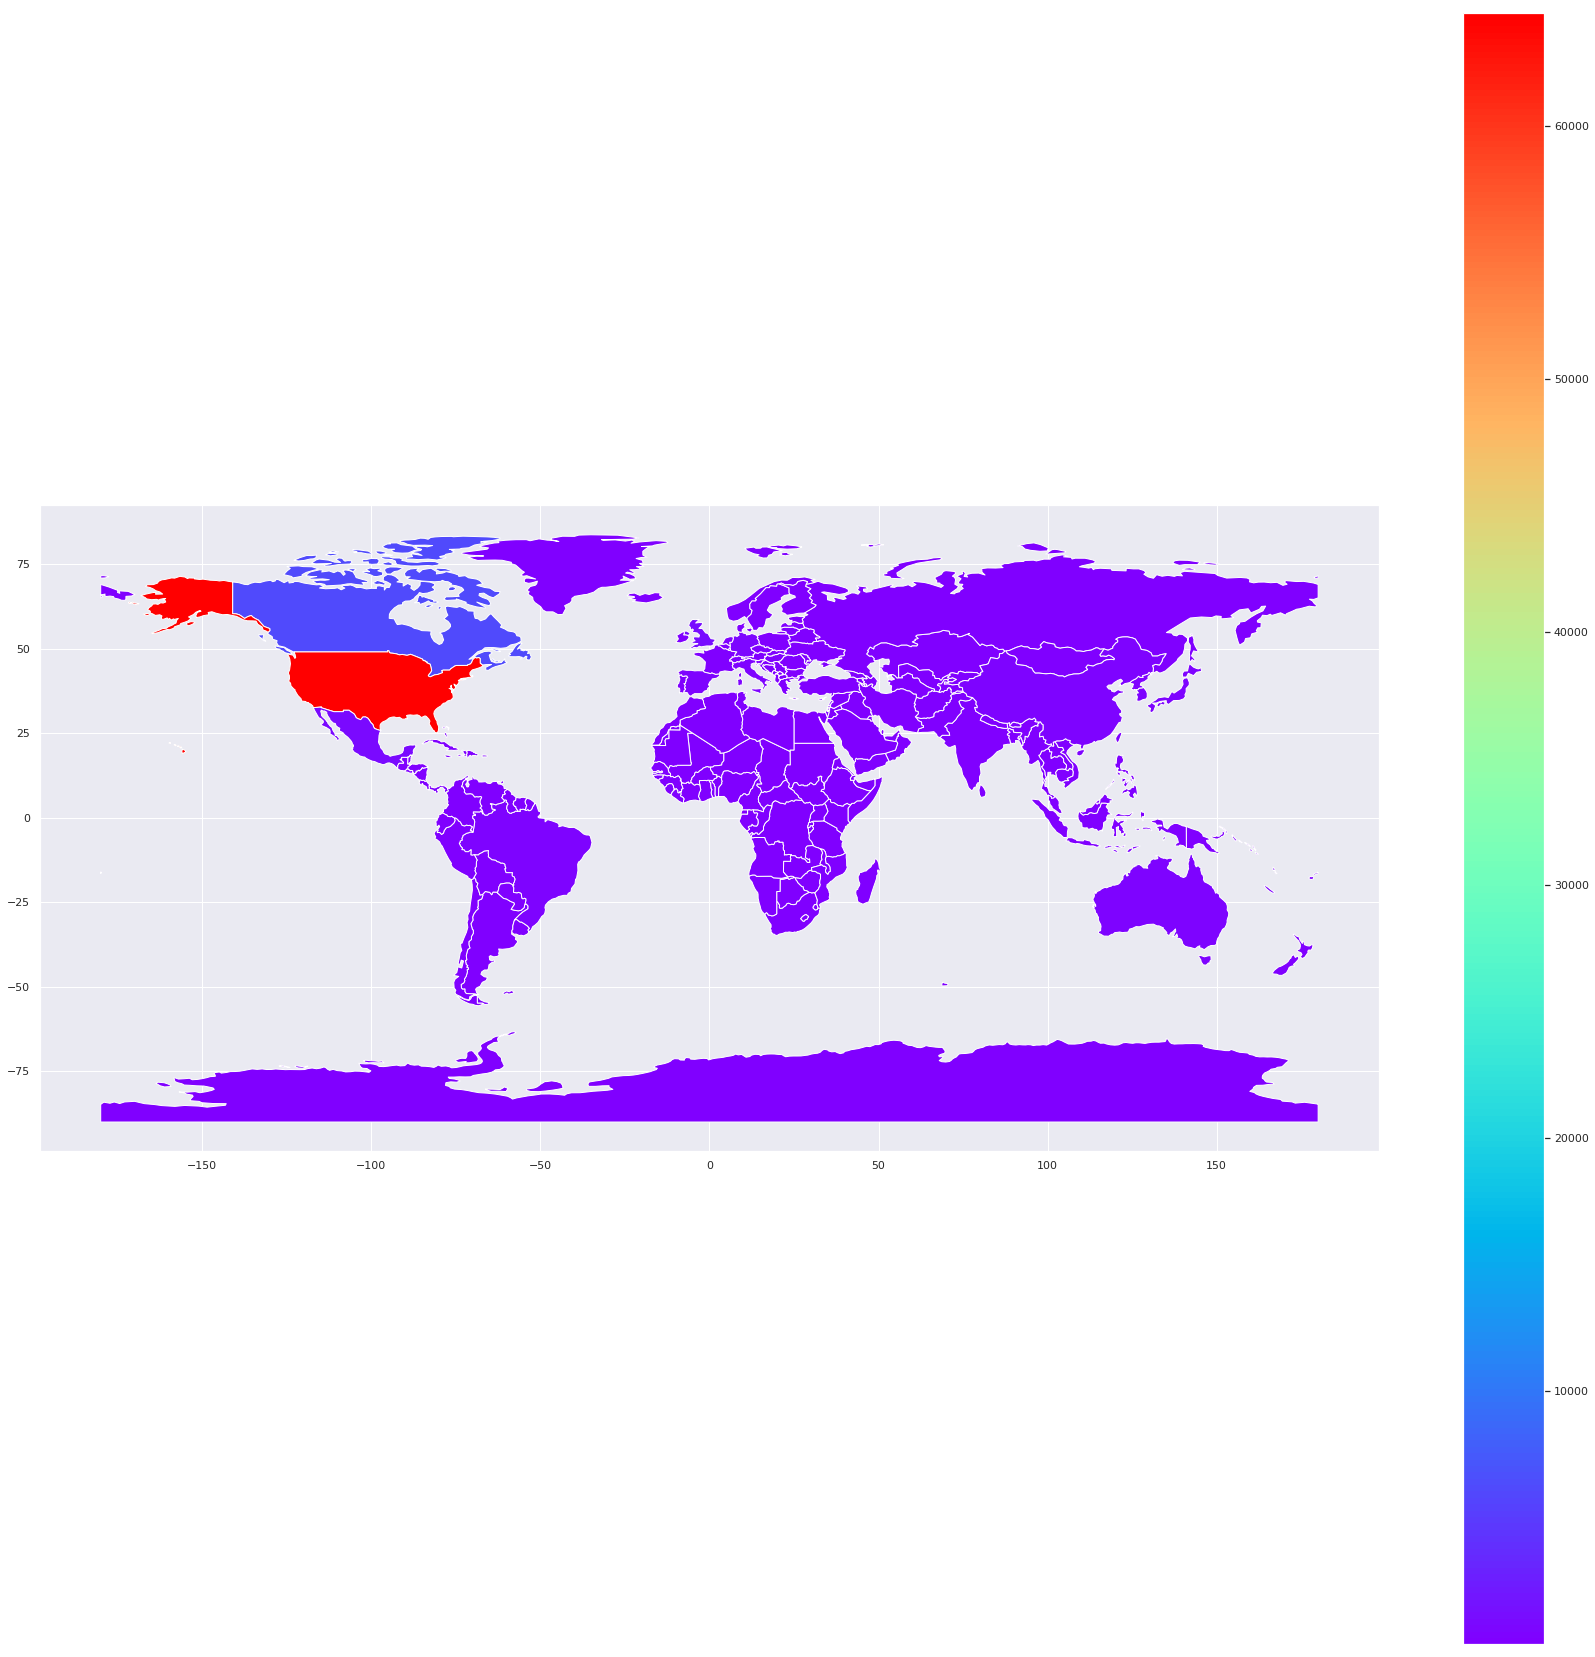

In [43]:
data.plot(column='Name', figsize=(30,30), cmap='rainbow', legend=True)

As expected, US runners represent the vast majority on Boston race followed for Canadians. Based on the data we conclude that geography proximity is relevant factor to determine runners nationality.

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


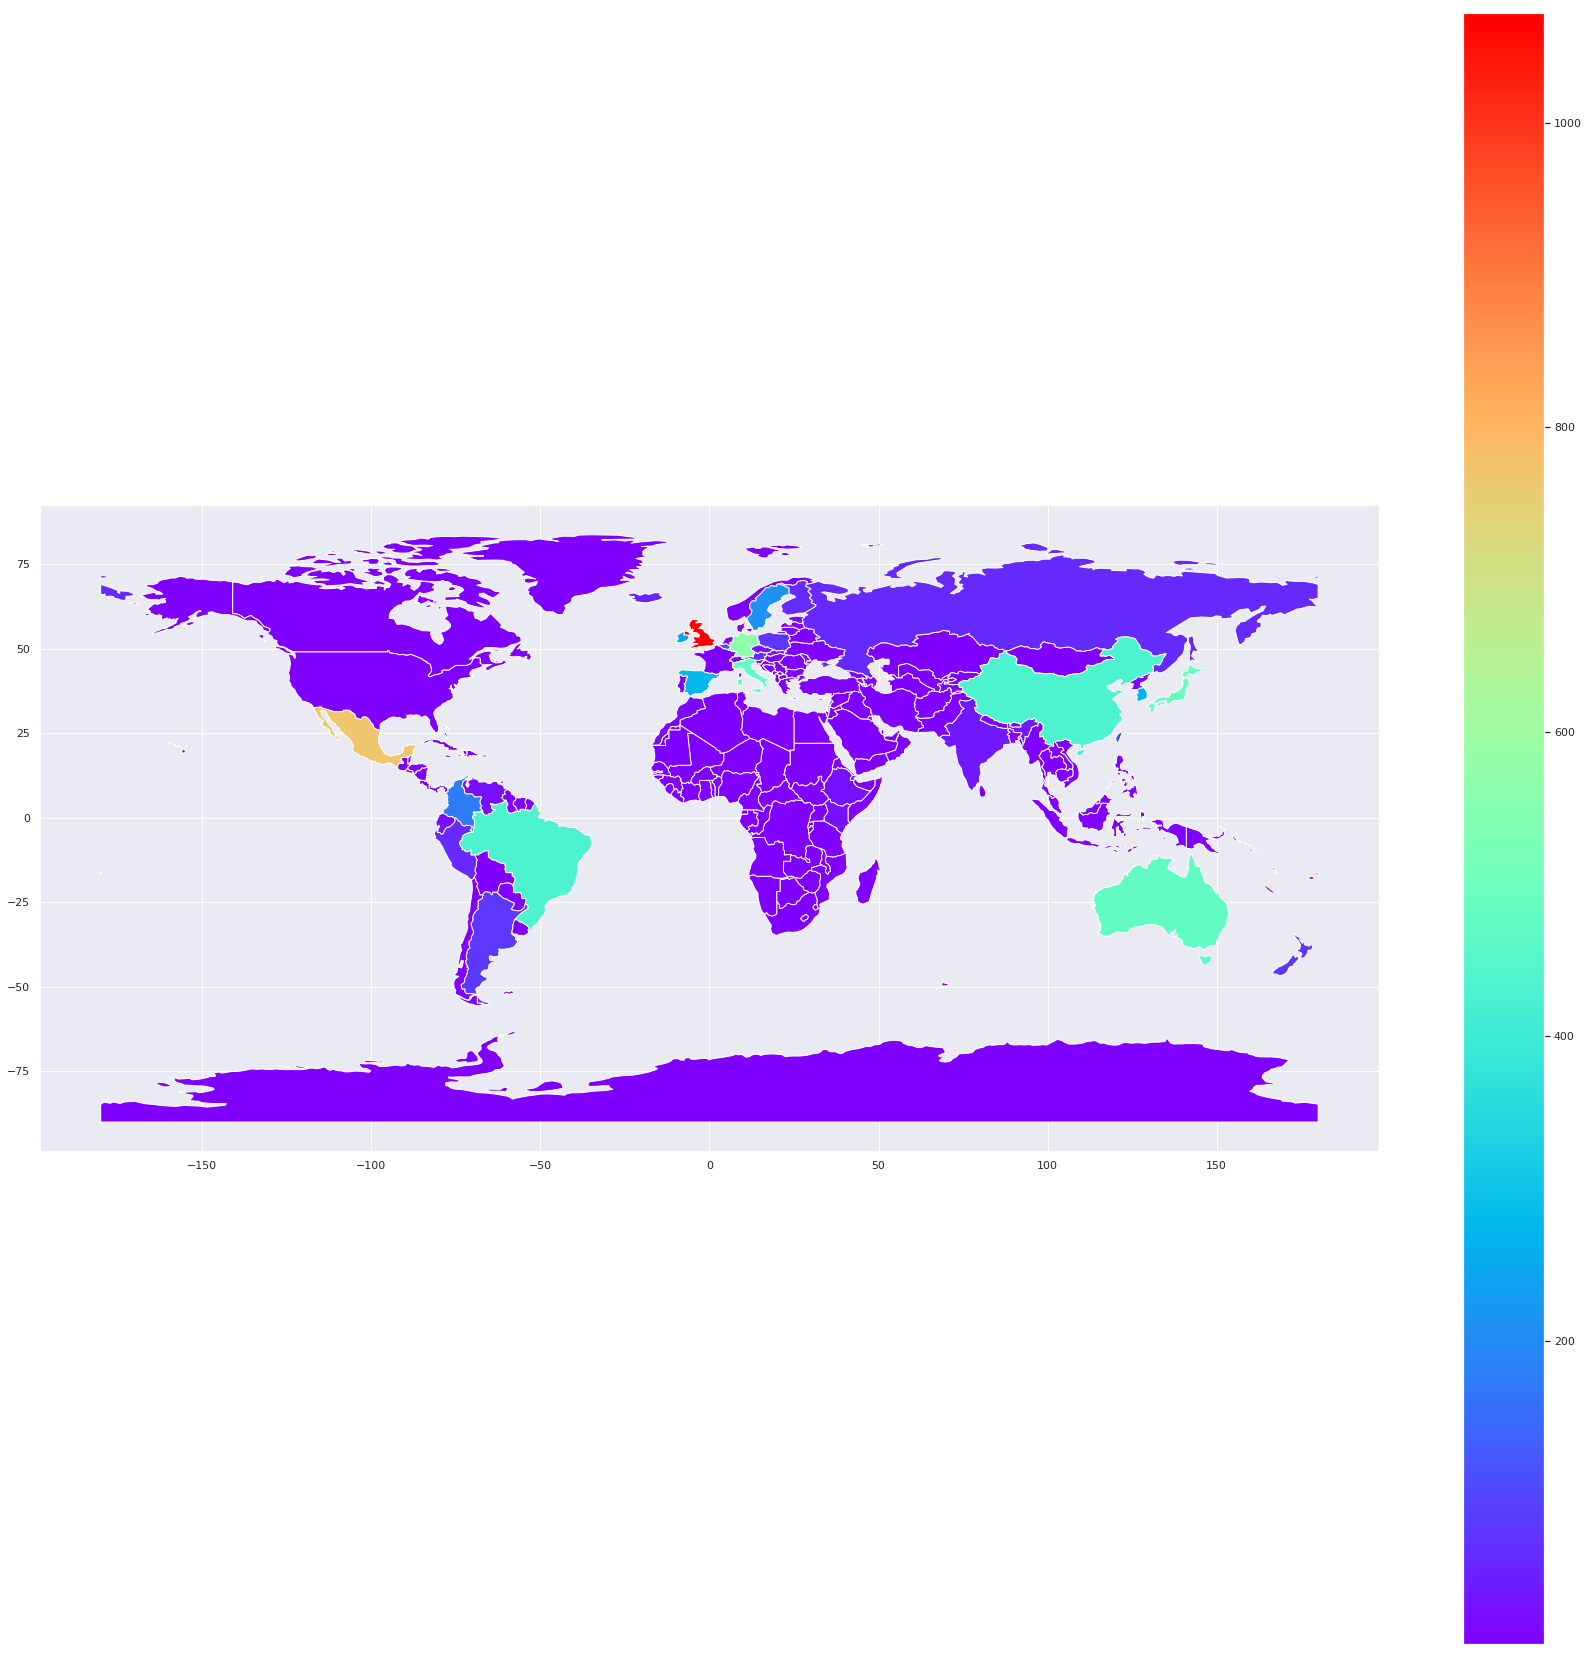

In [44]:
dataNew.plot(column='Name', figsize=(30,30), cmap='rainbow', legend=True)


Filtering by top 100

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


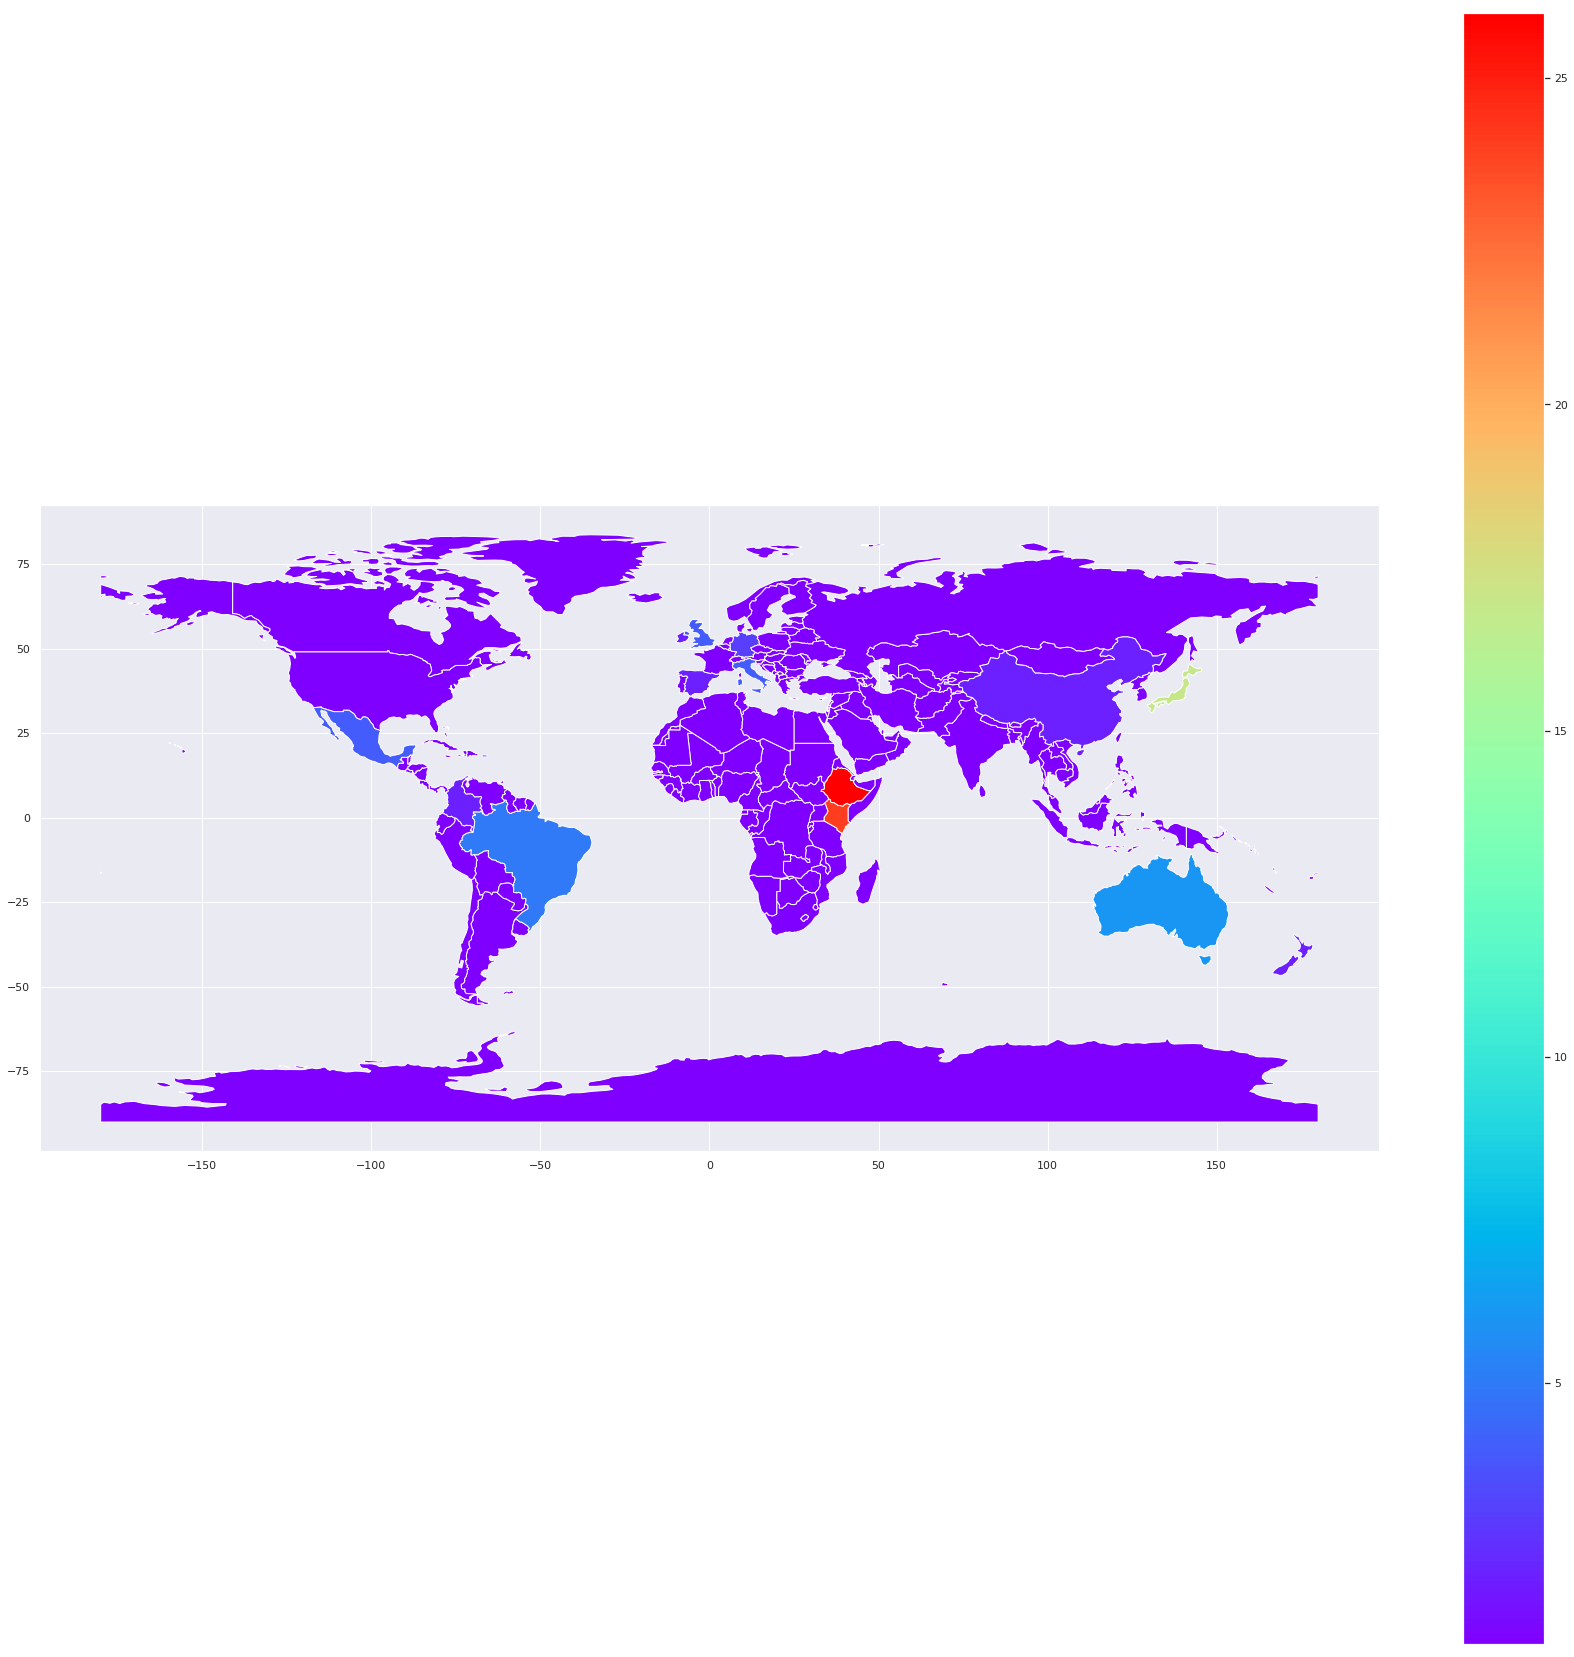

In [45]:
newTab=pd.pivot_table(df[df['Gender']<=100], values='Name', index='Country',aggfunc='count')
sumN=newTab['Name'].sum()
newTab=newTab.drop(['USA','CAN'])


dataNew=pd.merge(world, newTab, left_on='iso_a3', right_on='Country',how='left')
dataNew.plot(column='Name', figsize=(30,30), cmap='rainbow', legend=True)

We find that outside of the US and Canada, top 100 Runners primarily come from Ethiopia and Kenya, with Japan forming the next big runners nation.

We see that, according to the heatmap, the highest number of runners come from England and Mexico. Exploring in depth the nationality of runners from other countries rather than US and Canada:

In [46]:
percent=newTab['Name']*100/sumN
percent

Country
AUS    1.000000
BDI    0.166667
BEL    0.166667
BLR    0.166667
BRA    0.833333
BRN    0.166667
CHN    0.333333
COL    0.333333
CRO    0.166667
DEU    0.500000
ESP    0.333333
ETH    4.333333
GBR    0.666667
IRL    0.333333
ITA    0.666667
JPN    2.833333
KEN    4.000000
LAT    0.166667
MEX    0.666667
NED    0.333333
NOR    0.166667
NZL    0.333333
PHI    0.166667
RSA    0.166667
RUS    0.166667
UGA    0.166667
UKR    0.166667
ZIM    0.333333
Name: Name, dtype: float64

Top 100 Country analysis outside US and Canada. We take a look at the male and the female top 100 runners by country. As a percentage of total runners from outside the US.

In [47]:
male=df[df['M/F']=='M']
newTabmale=pd.pivot_table(male[male['Gender']<=100], values='Name', index='Country',aggfunc='count')
sumN=newTabmale['Name'].sum()

#newTabmale=newTabmale.drop(['USA','CAN'])


percent=newTabmale['Name']*100/sumN
percent

Country
AUS     0.333333
BEL     0.333333
BRA     1.000000
CAN     4.000000
DEU     0.666667
ESP     0.333333
ETH     3.333333
GBR     0.333333
IRL     0.333333
ITA     1.333333
JPN     3.333333
KEN     4.333333
MEX     0.666667
NED     0.666667
NZL     0.666667
RSA     0.333333
RUS     0.333333
UGA     0.333333
UKR     0.333333
USA    76.333333
ZIM     0.666667
Name: Name, dtype: float64

In [48]:
fmale=df[df['M/F']=='F']
newTabfmale=pd.pivot_table(fmale[fmale['Gender']<=100], values='Name', index='Country',aggfunc='count')
sumN=newTabfmale['Name'].sum()
#newTabfmale=newTabfmale.drop(['USA','CAN'])



percent=newTabfmale['Name']*100/sumN
percent

Country
AUS     1.666667
BDI     0.333333
BLR     0.333333
BRA     0.666667
BRN     0.333333
CAN     8.000000
CHN     0.666667
COL     0.666667
CRO     0.333333
DEU     0.333333
ESP     0.333333
ETH     5.333333
GBR     1.000000
IRL     0.333333
JPN     2.333333
KEN     3.666667
LAT     0.333333
MEX     0.666667
NOR     0.333333
PHI     0.333333
USA    72.000000
Name: Name, dtype: float64

Text(0.5, 1.0, 'Most popular Country (after US and Canada)')

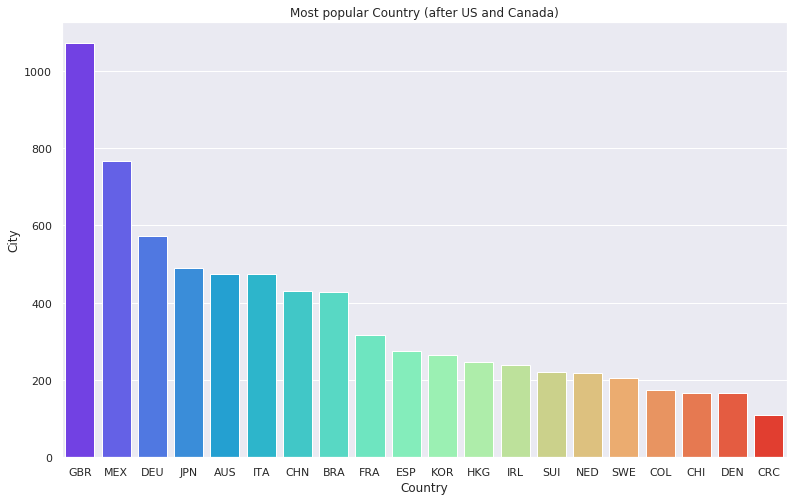

In [49]:
#Bar graph - Finishers per country (Excluding US and Canada)
s = df.groupby('Country').count()['City'].sort_values(ascending=False).head(22)[2:]
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country (after US and Canada)")

Great Britain, Mexico and Germany have greater number of runners on the Boston Marathon during 2015, 2016 and 2017 editions.

Analyzing the chart above, we can't see any African countries with a big number of runners on those marathon editions. However we do know that African runners are recognized for being on top elite Boston Marathon runners.

To explore relevance of African runners at the Marathon, let's analyze top 50 runners by nationality:

In [50]:
#Create a dataframe containing only top 50 runners of each year
Top_50 = df[df['Overall'] <= 50]
Top_50.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Overall,Gender,...,Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,1,1,...,29.73,10,6,1,25,14,32,0,0.61,Rain
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,2,2,...,29.73,10,6,1,25,14,32,0,0.61,Rain
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,3,3,...,29.73,10,6,1,25,14,32,0,0.61,Rain
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,4,4,...,29.73,10,6,1,25,14,32,0,0.61,Rain
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,5,5,...,29.73,10,6,1,25,14,32,0,0.61,Rain


Text(0.5, 1.0, 'Most popular Country on top 50')

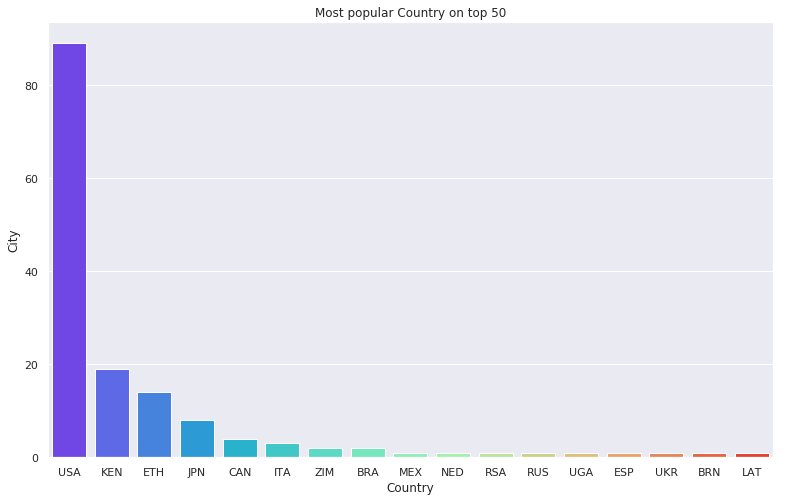

In [51]:
#most popular country of Marathon top 50
s = Top_50.groupby('Country').count()['City'].sort_values(ascending=False)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country on top 50")

As presented by the graph above, Kenia and Ethiopia are the countries with the biggest number of runners on top 50 after US.

Most Popular State in US

Text(0.5, 1.0, 'Most popular State')

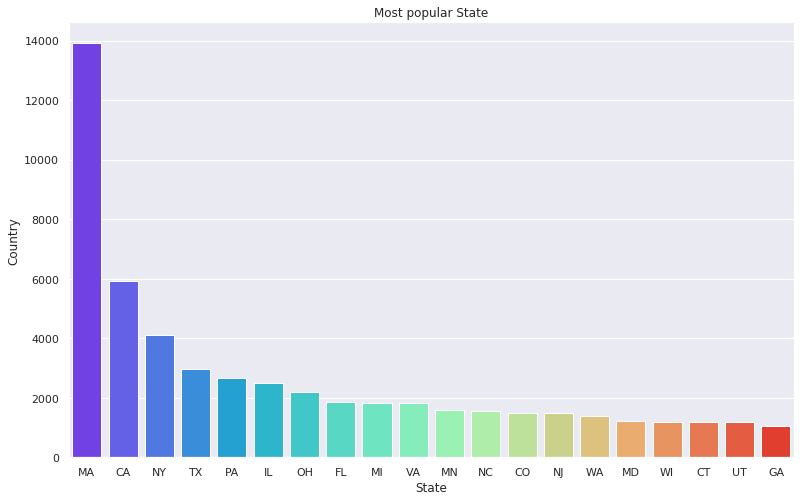

In [52]:
#Most Popular State in US
s = df[df['Country'] == 'USA'].groupby('State').count()['Country'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette="rainbow")
g.figure.set_size_inches(13,8)
g.set_title("Most popular State")

Most Popular City

Text(0.5, 1.0, 'Most popular City')

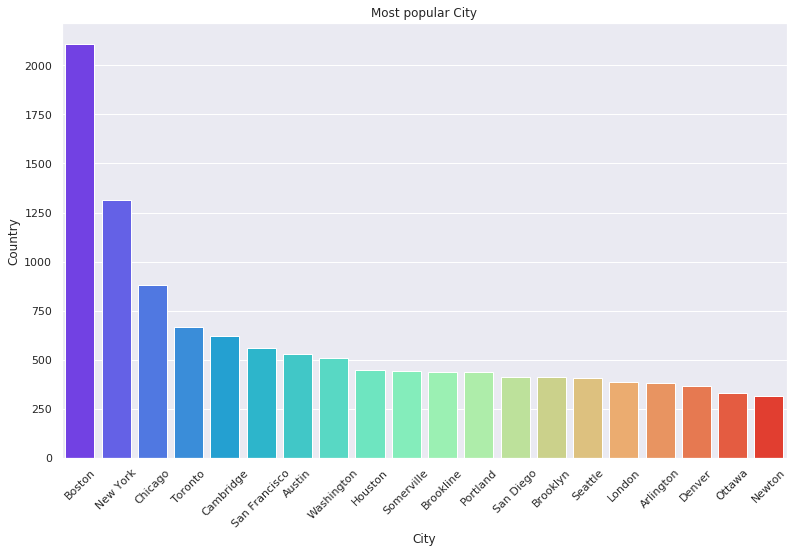

In [53]:
#most popular City in US
s = df[df['City'].notnull()].groupby('City').count()['Country'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title("Most popular City")

# Predictive Analysis

Linear Regression: Using the split times until half marathon to Finishing Time

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
model=LinearRegression()
X=df.iloc[:,12:21]
X=X.drop(columns=['25Ks','30Ks','35Ks','40Ks'],axis=1)
X['M/F_Male']=pd.get_dummies(df['M/F'])['M']
X['Age']=df['Age']
X.head()
#XTrain,XTest,yTrain,yTest=train_test_split()

,5Ks,10Ks,15Ks,20Ks,Halfs,M/F_Male,Age
0,883,1783,2697,3629,3842,1,25
1,883,1783,2698,3628,3841,1,30
2,883,1783,2697,3629,3842,1,29
3,883,1784,2701,3629,3842,1,28
4,883,1784,2698,3628,3841,1,32


In [0]:
y=df['Official Times']
XTrain, XTest, yTrain, yTest= train_test_split(X,y,test_size=0.2, random_state=833)

In [0]:
model.fit(XTrain, yTrain)
ymodel=model.predict(XTest)
yTest=np.array(yTest)

In [57]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(yTest, ymodel) 



548.529101810927

Now, we will predict the Final time for our team-mate, Dough, who ran in the marathon in 2015.
First, we create a dataframe with Dough's Data

In [58]:
Doughindex= df[df['Name']=='Sibor, Douglas C.'].index.values[0]
DoughDatay=y[Doughindex]

DoughDataX=df[df['Name']=='Sibor, Douglas C.'].iloc[:,12:21]
DoughDataX=DoughDataX.drop(columns=['25Ks','30Ks','35Ks','40Ks'],axis=1)
DoughDataX['M/F_Male']=1
DoughDataX['Age']=df[df['Name']=='Sibor, Douglas C.']['Age']



DoughTimePredict=model.predict(DoughDataX)

print("Predicted Value: ",int(DoughTimePredict))
print("Real Value: \t",DoughDatay)

Predicted Value:  14715
Real Value: 	 13853


In [59]:
DoughDataX

,5Ks,10Ks,15Ks,20Ks,Halfs,M/F_Male,Age
16577,1703,3309,4906,6513,6864,1,28


Lets check the model reliability!

In [60]:
cv_result = cross_val_score(model,XTest, yTest, cv=5)
print(cv_result)
np.mean(cv_result)

[0.87178709 0.87776319 0.89104632 0.86558279 0.86532404]


0.8743006869549305

This is the Value after dropping the 20Ks data- as you can see the result is worse off- don't know if we want to keep it as before or change it half only

In [0]:
DoughDataX=DoughDataX.drop('20Ks',axis=1)


In [62]:
DoughDataX
X=X.drop('20Ks', axis=1)
XTrain, XTest, yTrain, yTest= train_test_split(X,y,test_size=0.3, random_state=833)
model.fit(XTrain,yTrain)
ypredict=model.predict(DoughDataX)
print("Predicted Overall Time: ", int(ypredict))
print('Real Value: ',DoughDatay)

Predicted Overall Time:  14729
Real Value:  13853
